# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# **Load the dataset**

Using the Iris dataset as an example for classification problems

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# **Standardize the data**

Important for LDA as it is sensitive to scale.

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Apply LDA to reduce dimensionality while preserving class separability**

In [4]:
lda = LDA(n_components=2)  # Reduce to 2 components
X_lda = lda.fit_transform(X_scaled, y)

# **Visualize LDA transformation**

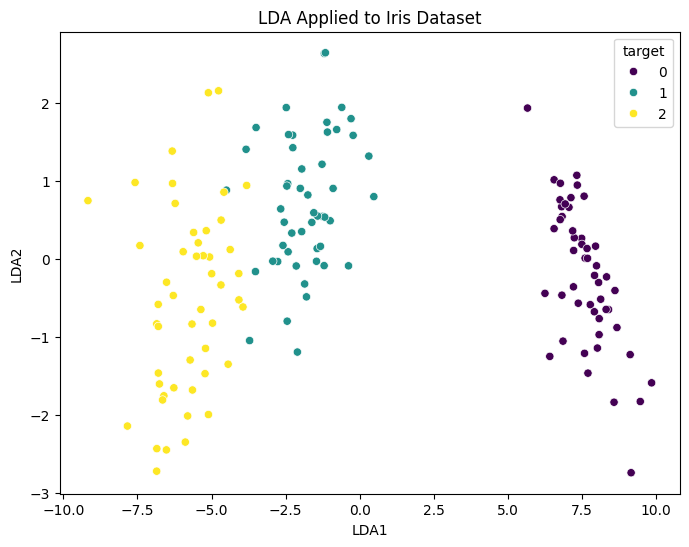

In [5]:
lda_df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
lda_df['target'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='LDA1', y='LDA2', hue=lda_df['target'], palette='viridis', data=lda_df)
plt.title('LDA Applied to Iris Dataset')
plt.show()

# **Split original and LDA-transformed data into train and test sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_lda, X_test_lda, _, _ = train_test_split(X_lda, y, test_size=0.2, random_state=42)

# **Train classifiers without LDA**

In [7]:
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f'Accuracy without LDA: {accuracy_original:.4f}')

Accuracy without LDA: 1.0000


# **Train classifiers with LDA-transformed data**

In [8]:
clf_lda = RandomForestClassifier(random_state=42)
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy with LDA: {accuracy_lda:.4f}')

Accuracy with LDA: 1.0000


# **Train Logistic Regression with LDA**

In [9]:
logreg_lda = LogisticRegression()
logreg_lda.fit(X_train_lda, y_train)
y_pred_logreg = logreg_lda.predict(X_test_lda)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy with LDA: {accuracy_logreg:.4f}')

Logistic Regression Accuracy with LDA: 1.0000
